## Example notebook to show how to use graph builder package

#### Importing data

data_tools.fetch_data can be used to fetch data from an API. It builds a data structure of the following form:
    
    - Dict{ function_name : Hexel} where Hexel has as attributes function, best_pairings, description, github commit and color.


In [5]:
from kymata.ippm import data_tools, denoiser
from kymata.ippm.builder import IPPMBuilder
from kymata.ippm.plotter import IPPMPlotter

hexels = data_tools.fetch_data('https://kymata.org/api/datasets/8')

#### Plotting data

stem_plot is a useful function to plot all of the data in hexels. Takes the hexels data structure illustrated above as input along with title.

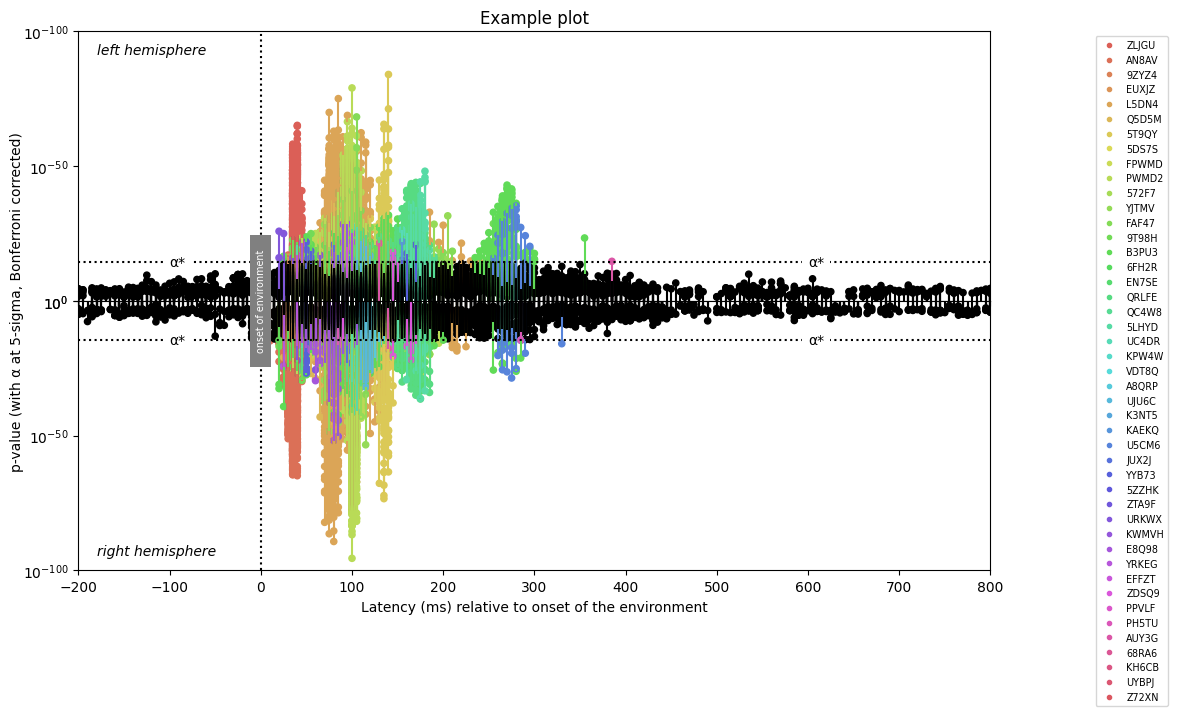

In [2]:
data_tools.stem_plot(hexels, 'Example plot')

#### Denoising

The first iteration of the denoiser is a max pooling strategy. It partitions the x-axis into bins and looks for clusters of spikes in each bin for each function. If a cluster is found, it takes the maximum. The returned hexels have the best_pairings reduced significantly.

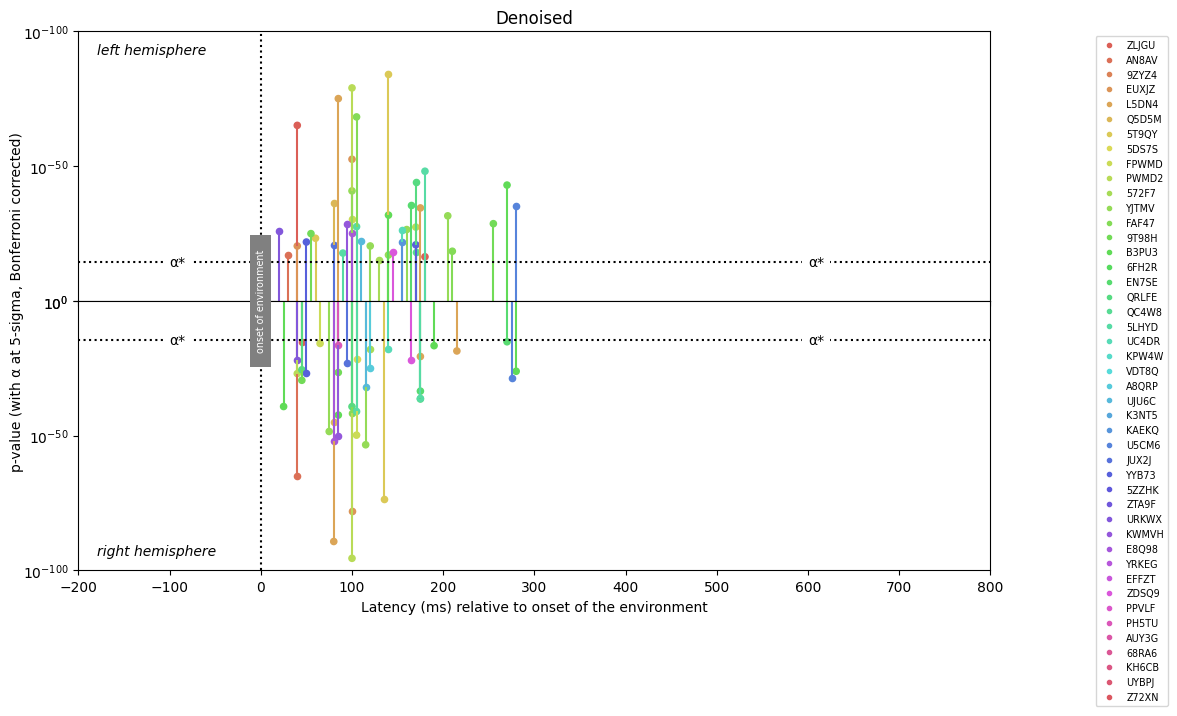

In [6]:
'''
    For more details on each algorithm, check the denoiser.py file and ctrl-f search for the names. If further details are required, you can check the relevant sklearn page too.
    Strategies
    ----------
        - Max Pooler : hyperparameters = [num_clusters, bin_sz]
                       num_clusters is the threshold for a bin to be considered a cluster. default=15
                       bin_sz is the size of the bin in ms. default = 25
        - Gaussian Mixture : hyperparameters = [max_gaussians, covariance_type, max_iter, n_init, init_params, random_state]
                       max_gaussians indicates the maximum number of gaussians in the mixture. default = 6.
                       covariance_type = [full, tied, diag, spherical]. default = full
                                       specifies the covariance matrix of the Gaussians
                       max_iter is the # of iterations til stop. default = 100.
                       n_init = # of initialisations. default = 3
                       init_params = [kmeans, k-means++, random, random_from_data]. default = kmeans++
                                    specifies how to initialise the parameters
                       random_state is a seed. Set it for reproducibility. default = None
        - DBSCAN : hyperparameters = [eps, min_samples, metric, metric_params, algorithm, leaf_size, n_jobs]
                       eps is the maximum distance between two samples to be considered in the neighbourhood.
                           default = 10.
                       min_samples the number of samples in a neighbourhood for a point to be a core point.
                           default = 2
                       metric used to compute distance. default = euclidean. check sklearn.metrics.pairwise_distance
                       metric_params additional params for metric. default = None.
                       algorithm = [auto, ball_tree, kd_tree, brute]. default = auto
                                 the algorithm used by nearestneighbours to compute distance.
                       leaf_size leaf size for ball_tree or kd_tree. default=30
                       n_jobs is the number of processors to use. default = -1.
        - Mean Shift : hyperparameters = [bandwidth, seeds, min_bin_freq, cluster_all, n_jobs]
                       bandwidth the bandwidth of the kernel. default = sklearn.cluster.estimate_bandwidth
                       seeds seeds used to initialise kernels. default = None
                       min_bin_freq accept only those bins with at least min_bin_freq points. default = 1
                       cluster_all false means to ignore anomalies. default = False
                       n_jobs is the number of processors to use. default = -1.
    the inputs for the strategy parameters are [max pooler, gaussian mixture, dbscan, mean shift].
'''
# algos : denoiser.[MaxPooler, DBSCAN, GMM, MeanShift]

clusterer = denoiser.DBSCAN()
denoised_hexels = clusterer.cluster(hexels, 'rightHemisphere') # rightHemisphere or leftHemisphere.
#denoised_hexels = clusterer.cluster(denoised_hexels, 'leftHemisphere')  # repeat for other hemi if you want to cluster both.
data_tools.stem_plot(denoised_hexels, 'Denoised')

#### Generating the Directed Graph

To generate a graph, we need relations between functions, in the form of a function hierarchy. It is 
a dictionary containing function names with their children. Furthermore, this dictionary needs to
contain the input function too. 

An additional input is the list of input functions. This is so we can differentiate between the spikes and inputs. Finally, it also takes the hemisphere and and title as input.

The result graph has as the y-axis the latency of spike, x-axis as class partitions, and node sizes as the magnitude of the spike. 

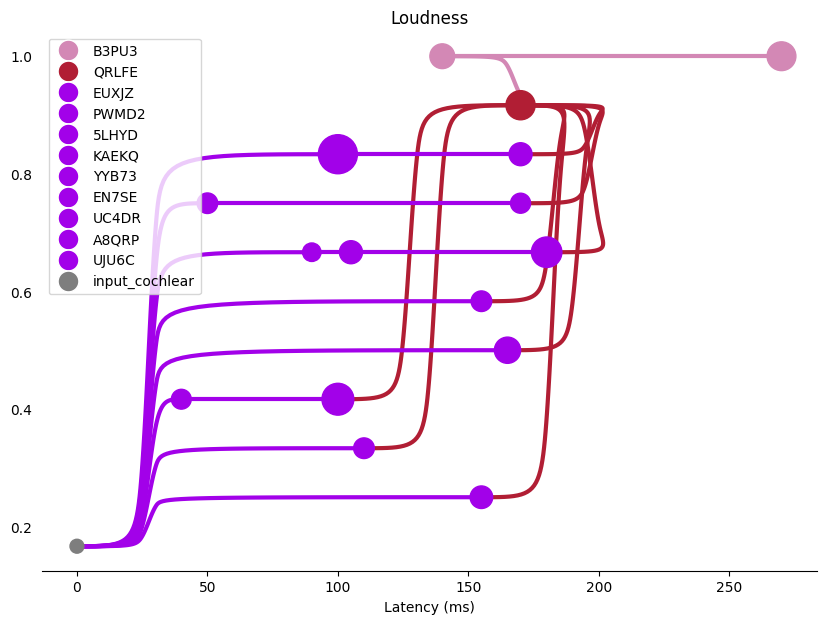

In [7]:
inputs = ['input_cochlear']
function_hier = {
        # assumption: we have a list of functions and their children function
        'B3PU3' : ['QRLFE'],
        'QRLFE' : ['EUXJZ', 'PWMD2', '5LHYD', 'KAEKQ', 'YYB73', 'EN7SE', 'UC4DR', 'A8QRP', 'UJU6C'],
        'EUXJZ' : ['input_cochlear'],
        'PWMD2' : ['input_cochlear'],
        '5LHYD' : ['input_cochlear'],
        'KAEKQ' : ['input_cochlear'],
        'YYB73' : ['input_cochlear'],
        'EN7SE' : ['input_cochlear'],
        'UC4DR' : ['input_cochlear'],
        'A8QRP' : ['input_cochlear'],
        'UJU6C' : ['input_cochlear'],
        'input_cochlear' : []
    }
function_colour_overrides = {
        # Functions and their colours to match the figures
        'B3PU3' : '#d388b5',
        'QRLFE' : '#b11e34',
        'EUXJZ' : '#a201e9',
        'PWMD2' : '#a201e9',
        '5LHYD' : '#a201e9',
        'KAEKQ' : '#a201e9',
        'YYB73' : '#a201e9',
        'EN7SE' : '#a201e9',
        'UC4DR' : '#a201e9',
        'A8QRP' : '#a201e9',
        'UJU6C' : '#a201e9',
        'input_cochlear' : '#7e7e7e'
    }
builder = IPPMBuilder()
plotter = IPPMPlotter()
graph_dict = builder.build_graph(denoised_hexels, function_hier, inputs, 'leftHemisphere')
plotter.draw(graph_dict, function_colour_overrides, 'Loudness', 7, 10)

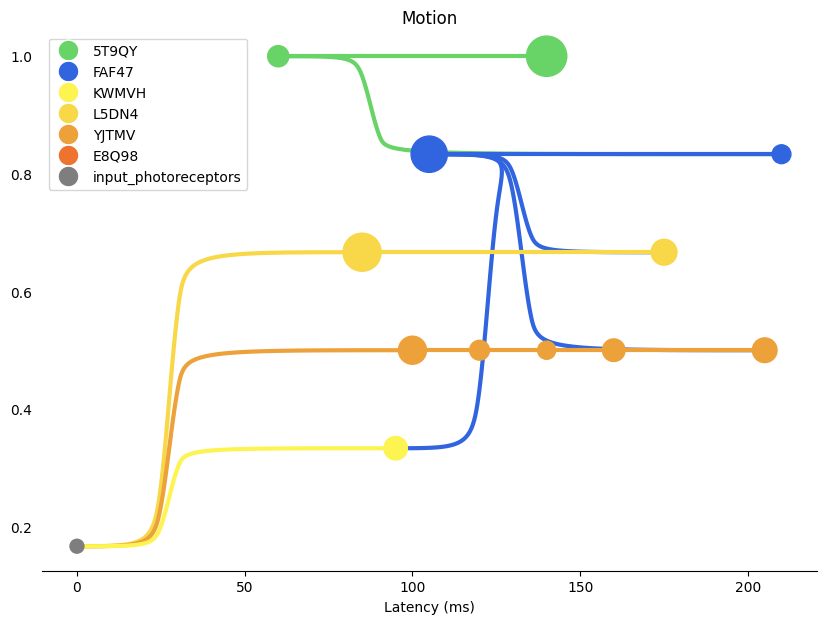

In [8]:
inputs = ['input_photoreceptors']
function_hier = {
        '5T9QY' : ['FAF47'],
        'FAF47' : ['KWMVH', 'L5DN4', 'YJTMV'],
        'YJTMV' : ['input_photoreceptors'],
        'KWMVH' : ['input_photoreceptors'],
        'L5DN4' : ['input_photoreceptors'],
        'input_photoreceptors' : []
    }
function_colour_overrides = {
        # Functions and their colours to match the figures
        '5T9QY' : '#68d366',
        'FAF47' : '#3165e0',
        'KWMVH' : '#fdf351',
        'L5DN4' : '#f8d748',
        'YJTMV' : '#eda13a',
        'E8Q98' : '#ed732e',
        'input_photoreceptors' : '#7e7e7e'
    }
builder = IPPMBuilder()
plotter = IPPMPlotter()
graph_dict = builder.build_graph(denoised_hexels, function_hier, inputs, 'leftHemisphere')
plotter.draw(graph_dict, function_colour_overrides, 'Motion', 7, 10)